In [46]:
from task_offloading_moo.pymoo.algorithms.puma_optimizer import PumaOptimizer
from task_offloading_moo.pymoo.problem import TaskOffloadingProblem
from task_offloading_moo.pymoo.operators.repair import TaskOffloadingRepair
from task_offloading_moo.pymoo.operators.sampling import TaskOffloadingSampling
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

In [ ]:
pop_size = 100
n_max_iters = 50

archive_size = int(0.4 * pop_size) + 1
num_archive_injections = int(pop_size*0.1)
archive_injections_prob = 0.3

num_cloud_machines = 30
num_fog_machines = 20
num_tasks = 500

algorithm = PumaOptimizer(repair=TaskOffloadingRepair(),
                      use_soft_repair=True,
                      pop_size=pop_size,
                      sampling=TaskOffloadingSampling(),
                      n_max_iters=n_max_iters,
                      archive_size=archive_size,
                      save_history=True,
                      num_archive_injections=num_archive_injections,
                      archive_injections_prob=archive_injections_prob
                    )

problem = TaskOffloadingProblem(num_cloud_machines, num_fog_machines, num_tasks, use_random_machines=True)

In [48]:
res = minimize(problem,
           algorithm,
           seed=1,
           verbose=True)

n_gen  |  n_eval  |     explor    |    exploit    |   is_explore  | n_nds  |      eps      |   indicator  
     1 |      100 |             0 |             0 |            no |      9 |             - |             -
     2 |      100 |  0.6666666667 |  0.1666666667 |           yes |    104 |  0.1317690110 |         ideal
     3 |      103 |  0.000000E+00 |  0.6653333333 |            no |     39 |  0.0211710338 |         ideal
     4 |      103 |  0.0120000000 |  2.6400000000 |            no |     48 |  0.000000E+00 |             f
     5 |      103 |  0.0360000000 |  0.000000E+00 |           yes |     48 |  0.000000E+00 |             f
     6 |      104 |  0.0063132004 |  0.0001147855 |           yes |     28 |  0.0031983689 |             f
     7 |      110 |  0.0037879202 |  0.0003443564 |           yes |     28 |  0.0011829214 |             f
     8 |      114 |  0.0101011206 |  0.0006887128 |           yes |     22 |  0.0039772807 |             f
     9 |      117 |  0.000000E+00 |  

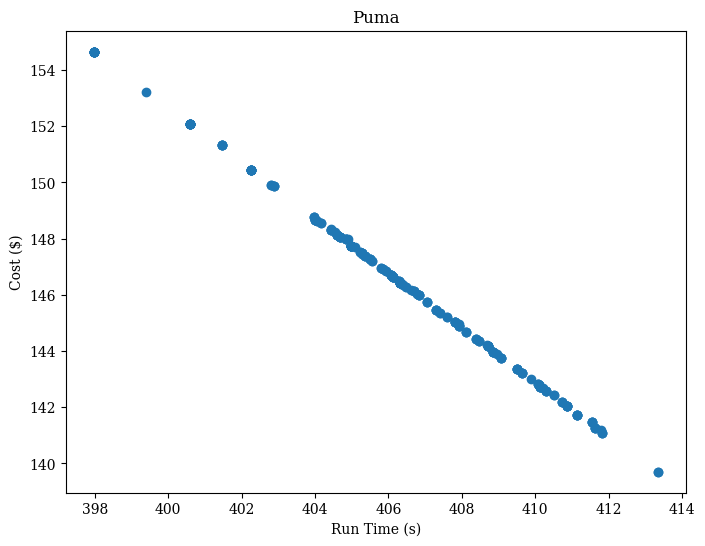

In [49]:
# print(f"Best population found:\n {res.X} \nwith F:\n{res.F}")

plot = Scatter(title="Puma")
plot.add(res.F)
plot.axis_labels = problem.dataset_generator.get_objective_names()
_ = plot.show()

In [50]:
# import numpy as np

# test = []
# for X in res.opt.get("X"):
#     test.append(problem.evaluate(X, return_values=True))
    
# plot = Scatter(title="Puma")
# plot.add(np.array(test))
# plot.axis_labels = problem.dataset_generator.get_objective_names()
# _ = plot.show()

In [51]:
for i in range(len(res.history)):
    s_opt = res.history[i].opt.get('F').shape
    s_pop = res.history[i].pop.get('F').shape
    
    if s_opt[1] != s_pop[1]:
        print(f"Rewriting {i}: {s_opt} -> {s_pop}")

In [52]:
import os
from task_offloading_moo.utils.utils import save_generations_video_pymoo

out_path = os.path.join(os.path.dirname(os.getcwd()), "output")
save_generations_video_pymoo(res.history, out_path, "puma_video")


In [53]:
# plot = Scatter(title="Puma")
# plot.add(res.archive.get("F"))
# plot.axis_labels = problem.dataset_generator.get_objective_names()
# _ = plot.show()